# Twitter Sentimental Analysis

## Packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


## Libraries

In [59]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

sns.set()

## Load Data

In [15]:
column_names = ['Target','ID','Date','Flag','User','Text']

In [16]:
raw_data = pd.read_csv('twitter_new.csv', encoding='latin-1',names= column_names)

In [17]:
raw_data.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
raw_data.tail()

,Target,ID,Date,Flag,User,Text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [20]:
raw_data.isnull().sum()

Target    0
ID        0
Date      0
Flag      0
User      0
Text      0
dtype: int64

In [21]:
##Removing Unwanted Columns

data = raw_data.drop(['ID','Date','Flag','User'], axis = 1)

In [22]:
data

,Target,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [24]:
data['Text'] = data['Text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))   # Remove special characters
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\d+', '', x))       # Remove numbers
data['Text'] = data['Text'].apply(lambda x: x.lower())

In [25]:
data

,Target,Text
0,0,switchfoot awww thats a bummer you shoulda ...
1,0,is upset that he cant update his facebook by t...
2,0,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...
...,...,...
1599995,4,just woke up having no school is the best feel...
1599996,4,thewdbcom very cool to hear old walt intervie...
1599997,4,are you ready for your mojo makeover ask me fo...
1599998,4,happy th birthday to my boo of alll time tupac...


In [36]:

# Download the NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Assuming Twitter_DF is your DataFrame with a 'text' column

# Convert 'text' column to lowercase
data['Text'] = data['Text'].str.lower()

# Tokenize the 'text' column into words
data['Text'] = data['Text'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['Text'] = data['Text'].apply(lambda words: [word for word in words if word not in stop_words])

# Join the remaining words back into a single string
data['Text'] = data['Text'].apply(lambda words: ' '.join(words))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santhoshsivansundaramoorthy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santhoshsivansundaramoorthy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [38]:
data['Target_0_1_2'] = data['Target'].apply(lambda x: 0 if x == 0 else 2 if x == 4 else 1)

In [42]:
data = data.drop('Target', axis = 1)

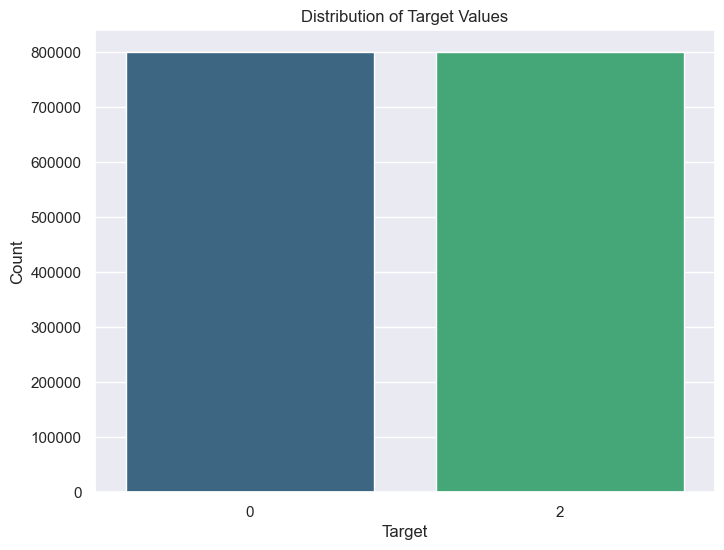

In [43]:


# Calculate the distribution of the 'target' column
target_distribution = data['Target_0_1_2'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Values')
plt.show()


The dataset has undergone several preprocessing steps to prepare it for sentiment analysis:

1. The dataset's target column has been transformed to have three distinct values: 0 for negative, 1 for neutral, and number 2 for positive sentiments.
2. All irrelevant features, such as IDs, dates, flags, and user information, have been removed from the dataset.
3. Preprocessing steps have been applied to ensure there are no null or missing values in the dataset.
4. Noise data, including punctuation, special characters, and URLs, has been eliminated to clean the text.
5. Text data has been converted to lowercase, and stopwords have been removed.
6. Notably, the dataset's target column exhibits a balanced distribution, with an equal number of positive and negative sentiment values.

In [44]:
data

,Text,Target_0_1_2
0,switchfoot awww thats bummer shoulda got david...,0
1,upset cant update facebook texting might cry r...,0
2,kenichan dived many times ball managed save re...,0
3,whole body feels itchy like fire,0
4,nationwideclass behaving im mad cant see,0
...,...,...
1599995,woke school best feeling ever,2
1599996,thewdbcom cool hear old walt interviews â,2
1599997,ready mojo makeover ask details,2
1599998,happy th birthday boo alll time tupac amaru sh...,2


In [46]:
feature = data['Text']
target = data['Target_0_1_2']

f_train, f_test, t_train, t_test = train_test_split(feature,target, test_size= 0.2, random_state=1999)

In [48]:
tv = TfidfVectorizer()
logreg = LogisticRegression(solver = "lbfgs",max_iter=200000)

In [49]:
model = Pipeline([('vectorizer',tv),('classifier',logreg)])

In [50]:
model.fit(f_train, t_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=200000))])

In [52]:
predictions = model.predict(f_test)

confusion_matrix(predictions, t_test)

array([[123299,  31166],
       [ 36401, 129134]])

In [53]:
print("Accuracy : ", accuracy_score(predictions, t_test))
print("Precision : ", precision_score(predictions, t_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, t_test, average = 'weighted'))

Accuracy :  0.788853125
Precision :  0.7894013385940005
Recall :  0.788853125


In [58]:
test = ["wow"]
result = model.predict(test)
print(result)

[2]
